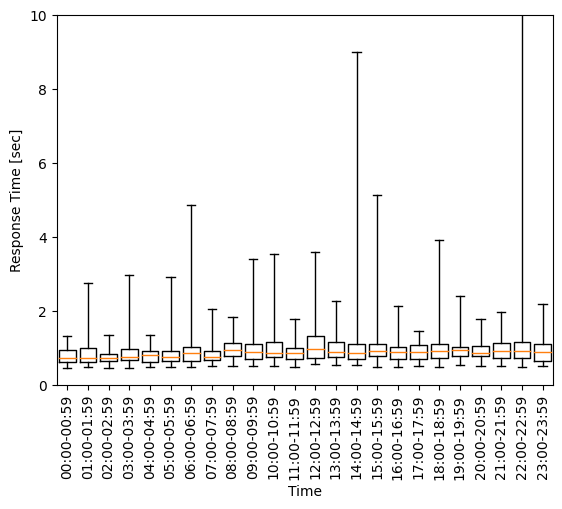

In [8]:
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

X_MAX = 10

# ログファイルのパス
log_file_path = "20230418.log"

# 成功ログの時分と実行時間を格納するリスト
success_logs = []

# エラーログを格納するリスト
error_logs = []

with open(log_file_path, "r", encoding="utf-8") as f:
    for line in f:
        if "HTML取得に成功" in line:
            # 成功ログの場合
            matched = re.search(r"\d{4}-\d{2}-\d{2} (\d{2}):\d{2}:\d{2}.*実行時間: ([0-9.]+)秒", line)
            if matched:
                success_logs.append((matched.group(1), float(matched.group(2))))
        elif "[ERROR]" in line:
            # エラーログの場合
            error_logs.append(line.strip())

# 1時間ごとにデータをまとめる
hourly_data = {}
for log in success_logs:
    dt = datetime.strptime(log[0], "%H")
    hour = dt.strftime("%H:00-%H:59")
    if hour not in hourly_data:
        hourly_data[hour] = []
    hourly_data[hour].append(log[1])

# 1時間1メモリの箱ひげ図を描画する
if hourly_data:
    x_labels = list(hourly_data.keys())
    x_ticks = [i + 0.5 for i in range(len(x_labels))]
    y_values = list(hourly_data.values())
    plt.boxplot(y_values, whis=[0, 100], positions=x_ticks, widths=0.8)
    plt.xticks(x_ticks, x_labels)
    plt.xticks(rotation = 90)  # 横軸のラベルを縦書きにする
    plt.ylim([0, X_MAX])  # 縦軸の最大値を設定
    plt.xlabel("Time")
    plt.ylabel("Response Time [sec]")
    plt.savefig("jbis_response_time.png")


In [2]:
# エラーログをファイルに出力する
if error_logs:
    with open("jbis_error.txt", "w", encoding="utf-8") as f:
        error_counts = {}
        for error in error_logs:
            if error in error_counts:
                error_counts[error] += 1
            else:
                error_counts[error] = 1
        for error, count in sorted(error_counts.items(), key=lambda x: x[1], reverse=True):
            f.write(f"{error}\t{count}\n")